# Chapter.5 Multi-variate Linear Regression

## Programming Assignment.5-05 MVLR with N_Samples
MVLR을 학습시키는데 2차원의 input이 아닌 N차원의 input을 통해서 이용하여 학습합니다
model은
$$\hat{y} = \theta_{5}x_{5} + \theta_{4}x_{4} + \theta_{3}x_{3} + \theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}$$

이고, loss는 square error를 사용하기 때문에
$$\mathcal{L} = (y - \hat{y})^{2}$$
가 됩니다.  



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import basic_nodes as nodes 

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

from LR_dataset_generator import LR_dataset_generator

plt.style.use('seaborn')
np.random.seed(0)

다음은 dataset이
$$y = 3x_{5} + 7x_{4} + 5x_{3} + 4x_{2} + 3x_{1}  - 1$$
에서부터 만들어지고,<br> $x_{5}$$x_{4}$$x_{3}$$x_{2}$,$x_{1}$는 standard normal distribution에서부터 만들어지는 코드입니다.
feature_dim 의 경우 5가 되고<br>
sample의 개수는 1000개로 설정한다

In [59]:

coefficient_list = [-1, 3, 4, 5, 7, 3]

data_gen = LR_dataset_generator(feature_dim = 5, n_sample = 1000)
data_gen.set_coefficient(coefficient_list)
distribution_params = {1:{'mean':0, 'std':1},
                       2:{'mean':0, 'std':1},
                       3:{'mean':0, 'std':1},
                       4:{'mean':0, 'std':1},
                       5:{'mean':0, 'std':1}
                      }
data_gen.set_distribution_params(distribution_params)
x_data, y_data = data_gen.make_dataset()



In [60]:
x_data.shape

(1000, 6)

In [61]:
x_data[0]

array([ 0.        ,  1.76405235,  0.55596268, -1.53292105,  1.59327362,
        0.61334917])

PA 5_04와 마찬가지로 node들을 배열로 생성하고<br>
Hyperparameter들을 설정합니다<br>
<br>
학습 조건은 다음과 같습니다.<br>
- $\theta_{5}, \theta_{4}, \theta_{3}, \theta_{2}, \theta_{1}, \theta_{0} = 0.1, 0.1, 0.1$
- learning rate = 0.00005
- iterations = 2

In [74]:
feature_dim = 5
node1 = [None] + [nodes.mul_node() for _ in range(feature_dim)]
node2 = [None] + [nodes.plus_node() for _ in range(feature_dim)]
node3 = nodes.minus_node()
node4 = nodes.square_node()



th_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

lr = 0.005
epochs = 10
th_accum = np.array(th_list).reshape(-1, 1)


loss_list = []


In [75]:
for epoch in range(epochs):
    for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
        #Forward Propagation start
        z1_list = [None] * (feature_dim + 1)
        z2_list, dz2_list, dz1_list, dth_list = z1_list.copy(), z1_list.copy(), z1_list.copy(), z1_list.copy()
        
        for node_idx in range(1, feature_dim + 1):
            z1_list[node_idx] = node1[node_idx].forward(th_list[node_idx], X[node_idx])
        
        z2_list[1] = node2[1].forward(th_list[0], z1_list[1])
        for node_idx in range(2, feature_dim + 1):
            z2_list[node_idx] = node2[node_idx].forward(z2_list[node_idx - 1], z1_list[node_idx])
        z3 = node3.forward(y, z2_list[-1])
        loss = node4.forward(z3)
        #Forward Propagation end
        
        #Backward Propagation start
        dz3 = node4.backward(1)
        _, dz2_last = node3.backward(dz3)
        dz2_list[-1] = dz2_last
        
        for node_idx in reversed(range(1, feature_dim + 1)):
            dz2, dz1 = node2[node_idx].backward(dz2_list[node_idx])
            dz2_list[node_idx - 1] = dz2
            dz1_list[node_idx] =  dz1
        
        dth_list[0] = dz2_list[0]
        for node_idx in reversed(range(1, feature_dim + 1)):
            dth, _ = node1[node_idx].backward(dz1_list[node_idx])
            dth_list[node_idx] = dth
        #Backward Propagation end
        

        for th_idx in range(len(th_list)):
            th_list[th_idx] = th_list[th_idx] - lr*dth_list[th_idx]
        th_next = np.array(th_list).reshape(-1, 1)
        th_accum = np.hstack((th_accum, th_next))
        loss_list.append(loss)

Text(0.5, 1.0, 'Loss')

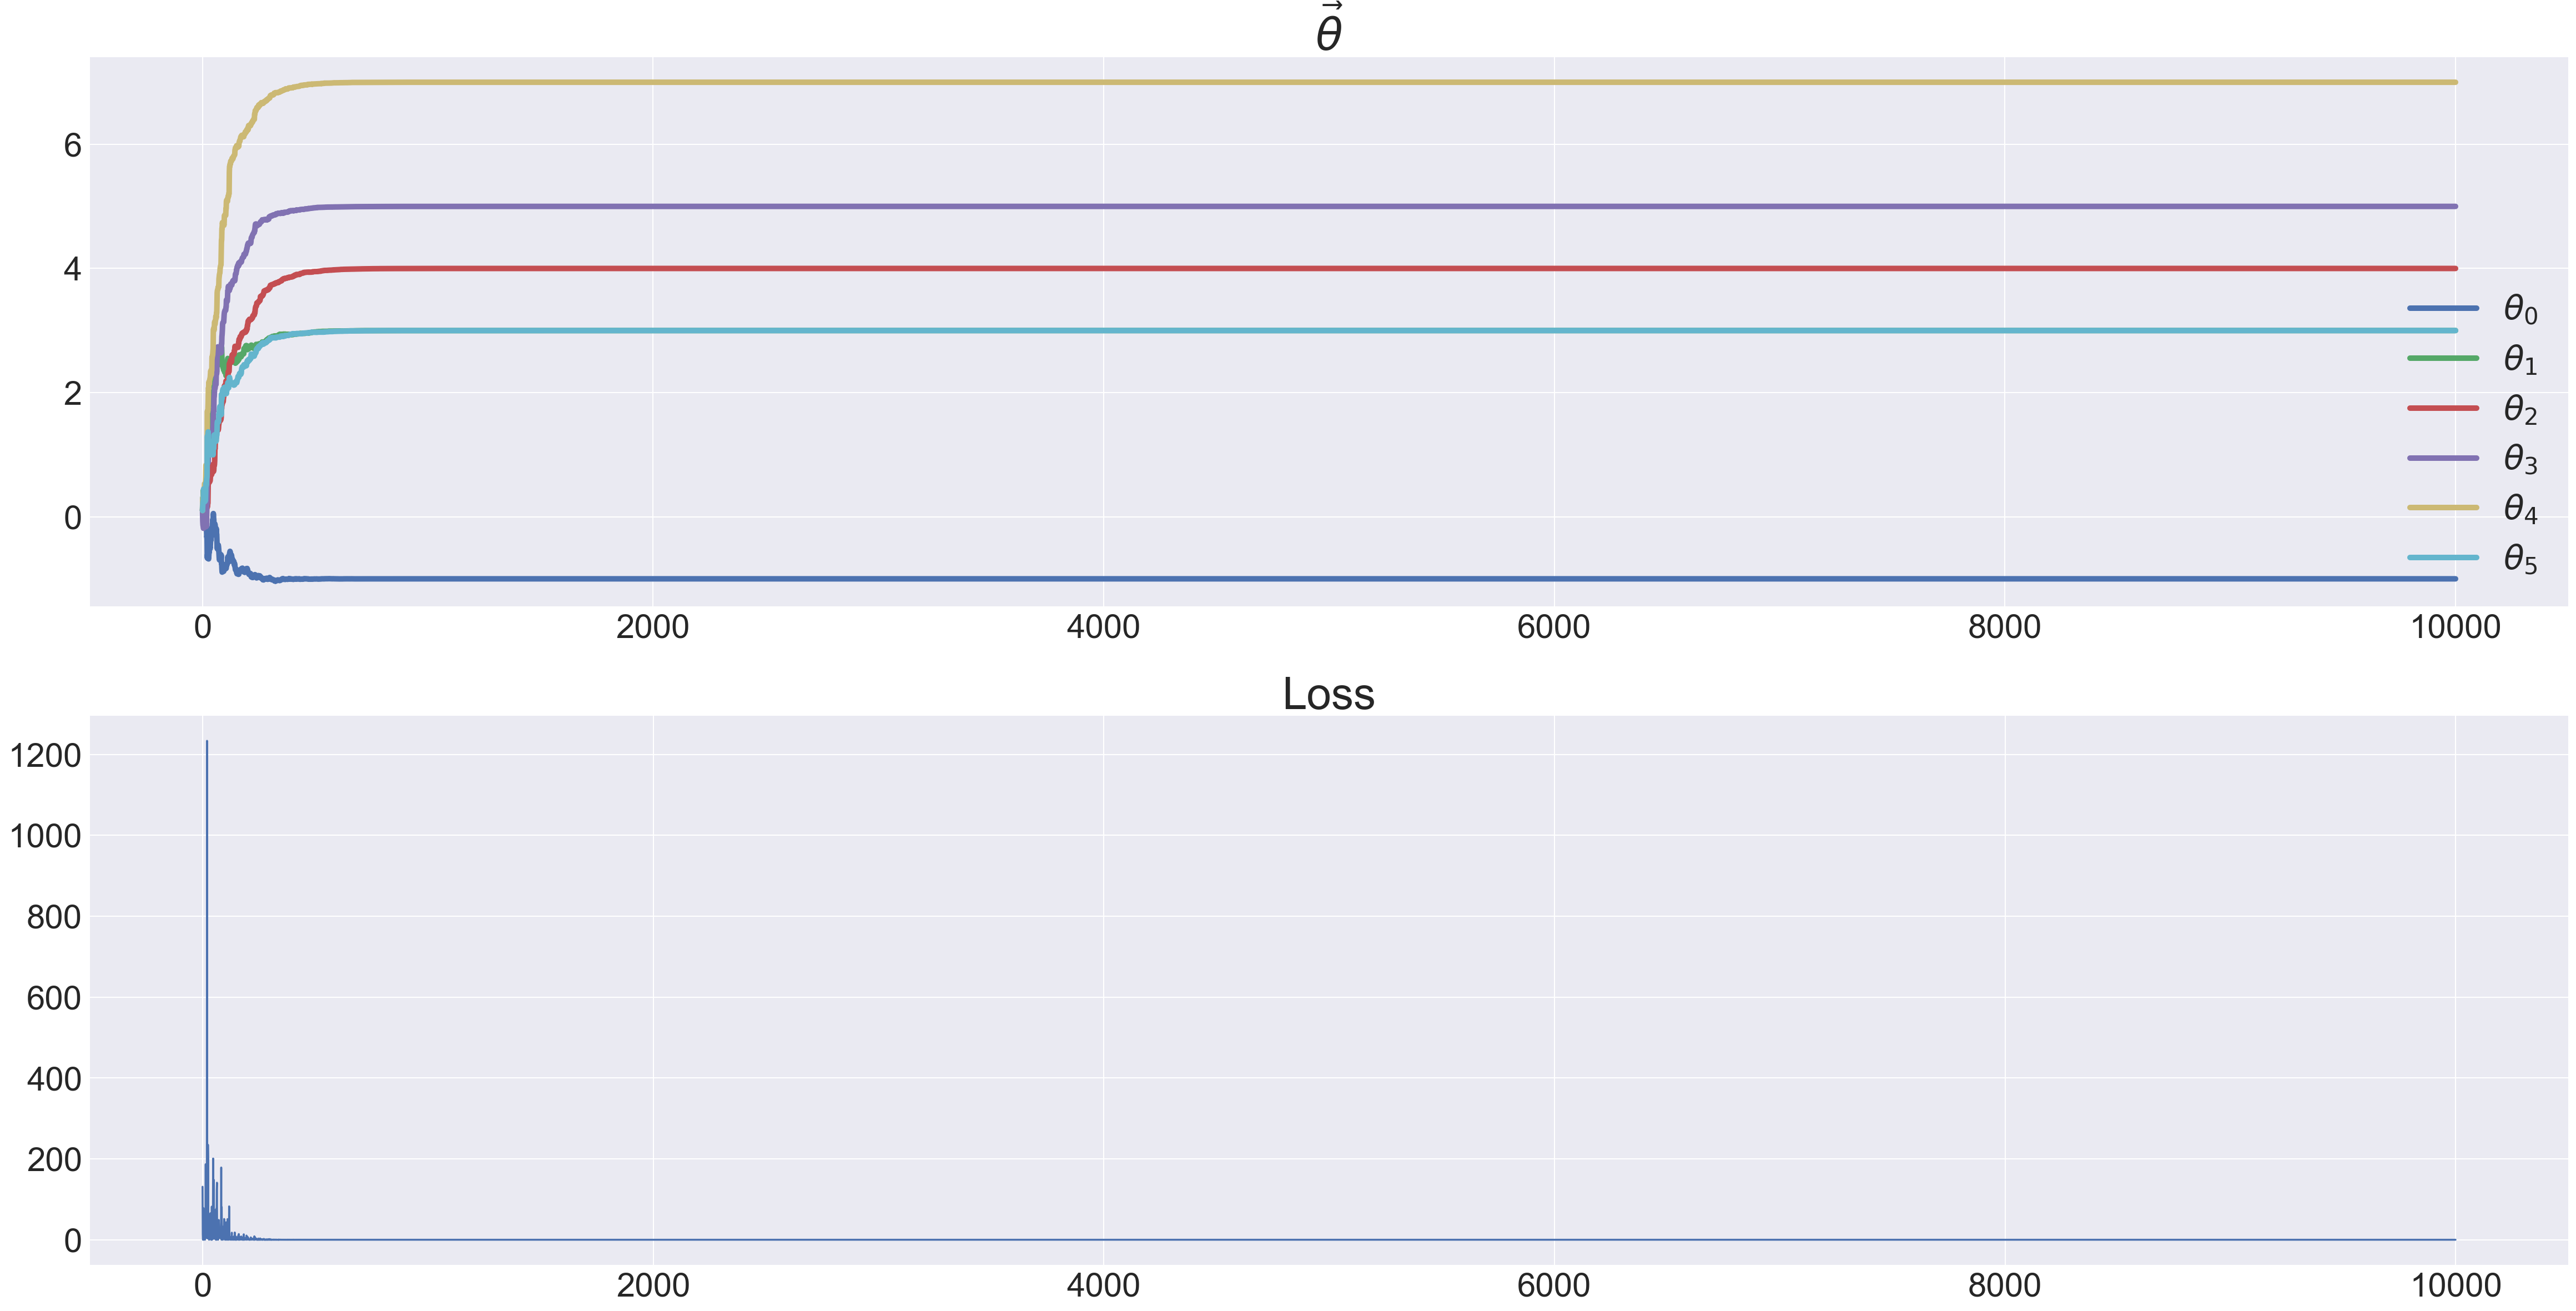

In [76]:
fig, ax = plt.subplots(2, 1, figsize = (40, 20))

for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i,
               linewidth = 5)
ax[1].plot(loss_list)
ax[0].legend(loc = 'lower right',
            fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 30)

ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Loss', fontsize = 40)

**Expected Output**  
<img src='./imgs/5_05_1.png' width = 800>

In [80]:
th_accum[:, -1]

array([-1.,  3.,  4.,  5.,  7.,  3.])